# **FLOWER RECOGNITION**
[Reference](https://www.kaggle.com/code/suyashsunilraomorale/cnn-for-flower-recognition#Buliding-Model)

# Importing necessary libraries

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import splitfolders

from IPython.display import Image, display
from keras import layers, models

#from keras_tuner import RandomSearch
#from keras_tuner.engine.hyperparameters import HyperParameters
import random
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(tf.__version__)

2.10.0


**displaying flower images from each class**

daisy


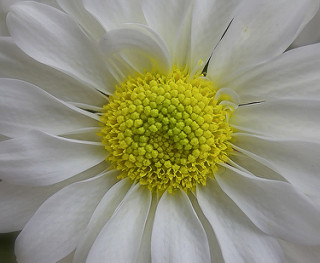

dandelion


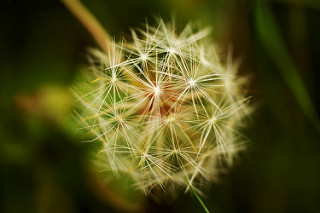

rose


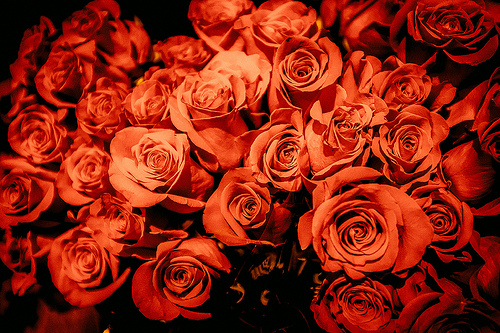

sunflower


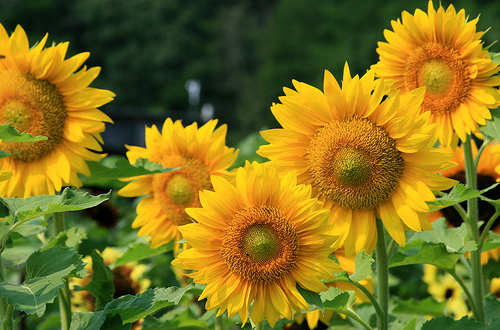

tulip


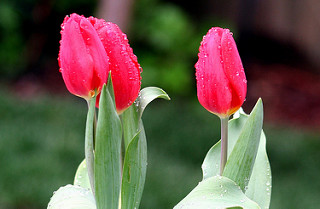

In [47]:
listOfImageNames = ['./datasets/daisy/100080576_f52e8ee070_n.jpg',
                    './datasets/dandelion/10043234166_e6dd915111_n.jpg',
                    './datasets/rose/10503217854_e66a804309.jpg',
                    './datasets/sunflower/1008566138_6927679c8a.jpg',
                    './datasets/tulip/100930342_92e8746431_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))

# **creating a training and testing data**

In [48]:
# Model config
batch_size = 32
epochs = 150

target_size = (64,64)

In [49]:
splitfolders.ratio('./datasets/', './split_datasets/', seed=1337, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:02, 1775.80 files/s]


DataGenerator
**Returns**
- A DirectoryIterator yielding tuples of (x, y) 
- where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) 
- and y is a numpy array of corresponding labels.

In [50]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, # normalization
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2
)

validate_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [51]:
train_data =  train_datagen.flow_from_directory(
        "./split_datasets/train",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

validate_data = validate_datagen.flow_from_directory(
        "./split_datasets/val",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

test_data =  test_datagen.flow_from_directory(
        "./split_datasets/test",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 3942 images belonging to 5 classes.
Found 1569 images belonging to 5 classes.
Found 830 images belonging to 5 classes.


1. total images in train_data = 3238, batch size = 32, therefore total no. of batches formed are 3238/32 = 101.
2. total images in test_data = 1079, batch size = 32, therefore total no. of batches formed are 1079/32 = 33.

In [52]:
# train_labels=[]
# traindata=[]
# for i in range(0,102):
#     train_labels.extend(np.array(train_data[i][1])) # x
#     traindata.extend(np.array(train_data[i][0])) # y
    
# test_labels=[]
# testdata=[]
# for i in range(0,34):
#     test_labels.extend(np.array(test_data[i][1]))
#     testdata.extend(np.array(test_data[i][0]))

# **Buliding Model**

In [53]:
# Buile CNN model
cnn = models.Sequential()

cnn.add(Conv2D (32, (3,3), activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Conv2D (64, (3,3), activation='relu'))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Conv2D (96, (3,3), activation='relu'))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Dropout (0.1))
cnn.add(Flatten ())

cnn.add(Dense (units=128, activation='relu'))
cnn.add(Dense (units=5, activation='softmax'))

# plot the model's detail (layers, input & output shapes)
plot_model(cnn, to_file='./output/cnn_model.png', 
           show_shapes=True, show_layer_names=False, 
           rankdir='TB', # TB: vertical; LR: horizontal
           expand_nested=False, dpi=96)

# show the summary of the model
cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 96)        

## **Compile & train the model**

In [54]:
# compile the model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# creating early stopping
es = EarlyStopping(monitor='val_loss', 
                   patience=6, mode='min')

# train the model
history = cnn.fit(train_data,
                verbose=1, validation_data= validate_data,
                batch_size= batch_size, epochs= epochs)

# save model
cnn.save('./output/cnn_model.h5')

Epoch 1/150


2023-03-22 21:03:21.032402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - ETA: 0s - loss: 1.3465 - accuracy: 0.3899

2023-03-22 21:03:31.772330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 14s 108ms/step - loss: 1.3465 - accuracy: 0.3899 - val_loss: 1.1354 - val_accuracy: 0.5041
Epoch 2/150
124/124 [==============================] - 12s 100ms/step - loss: 1.1011 - accuracy: 0.5449 - val_loss: 1.0482 - val_accuracy: 0.5692
Epoch 3/150
124/124 [==============================] - 12s 100ms/step - loss: 1.0434 - accuracy: 0.5733 - val_loss: 0.9794 - val_accuracy: 0.5876
Epoch 4/150
124/124 [==============================] - 13s 101ms/step - loss: 0.9698 - accuracy: 0.6218 - val_loss: 0.9327 - val_accuracy: 0.6240
Epoch 5/150
124/124 [==============================] - 13s 103ms/step - loss: 0.9380 - accuracy: 0.6286 - val_loss: 0.8627 - val_accuracy: 0.6558
Epoch 6/150
124/124 [==============================] - 12s 100ms/step - loss: 0.9002 - accuracy: 0.6456 - val_loss: 0.9980 - val_accuracy: 0.6144
Epoch 7/150
124/124 [==============================] - 12s 100ms/step - loss: 0.8684 - accuracy: 0.6606 - val_loss: 0.9478 - val_accurac

# **Visualizing the performance**

**Show training result: accuracy vs loss**

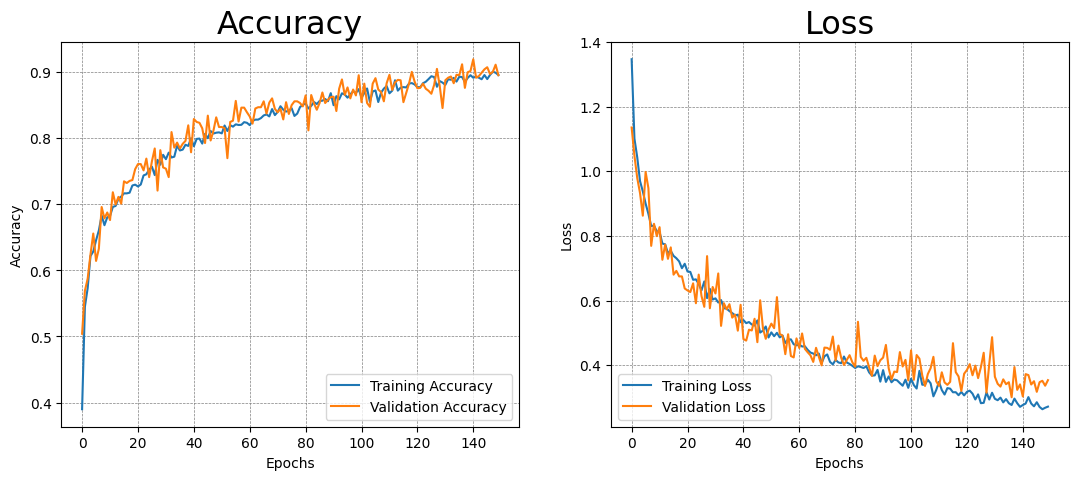

26/26 [==============================] - 2s 66ms/step - loss: 0.4107 - accuracy: 0.8831
Accuracy: 88.31325769424438


In [55]:
# set figure size (inches)
plt.figure(figsize=(13, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy',size='23')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.title('Loss',size='23')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.savefig('./output/result_accuracy_loss.png')

plt.show()

# show accuray from the test_data
loss, accuracy= cnn.evaluate(test_data)
print(f'Accuracy: {accuracy*100}')

## **Evaluting the model on test data**

**Display ground truth of the testing data**

In [56]:
# Ground Truth of the testing data
test_labels, testdata = [],[]

for i in range(0,len(test_data)):
    test_labels.extend(np.array(test_data[i][1]))
    testdata.extend(np.array(test_data[i][0]))

test_lbls = []
for i in test_labels:
    if all(i == [0., 0., 0., 0., 1.]):
        test_lbls.append('tulip')
    elif all(i == [0., 0., 0., 1., 0.]):
        test_lbls.append('sunflower')
    elif all(i == [0., 0., 1., 0., 0.]):
        test_lbls.append('rose')
    elif all(i == [0., 1., 0., 0., 0.]):
        test_lbls.append('dendelion')
    elif all(i == [1., 0., 0., 0., 0.]):
        test_lbls.append('daisy')

**Predict the test data via CNN mdoel trained in above**


In [57]:
# predict via the CNN model trained above
pred = cnn.predict(test_data)
pred_digits = np.argmax(pred,axis=1)

# transforming one-hot encoding labels into actual labels name
pred_lbls = []
for i in pred_digits:
    if (i == 4):
        pred_lbls.append('tulip')
    elif (i == 3):
        pred_lbls.append('sunflower')
    elif (i == 2):
        pred_lbls.append('rose')
    elif (i == 1):
        pred_lbls.append('dendelion')
    elif (i == 0):
        pred_lbls.append('daisy')


 3/26 [==>...........................] - ETA: 0s

2023-03-22 21:34:54.208866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 2s 55ms/step


prediciton result: (correct) 15 
prediciton result: (incorrect) 0


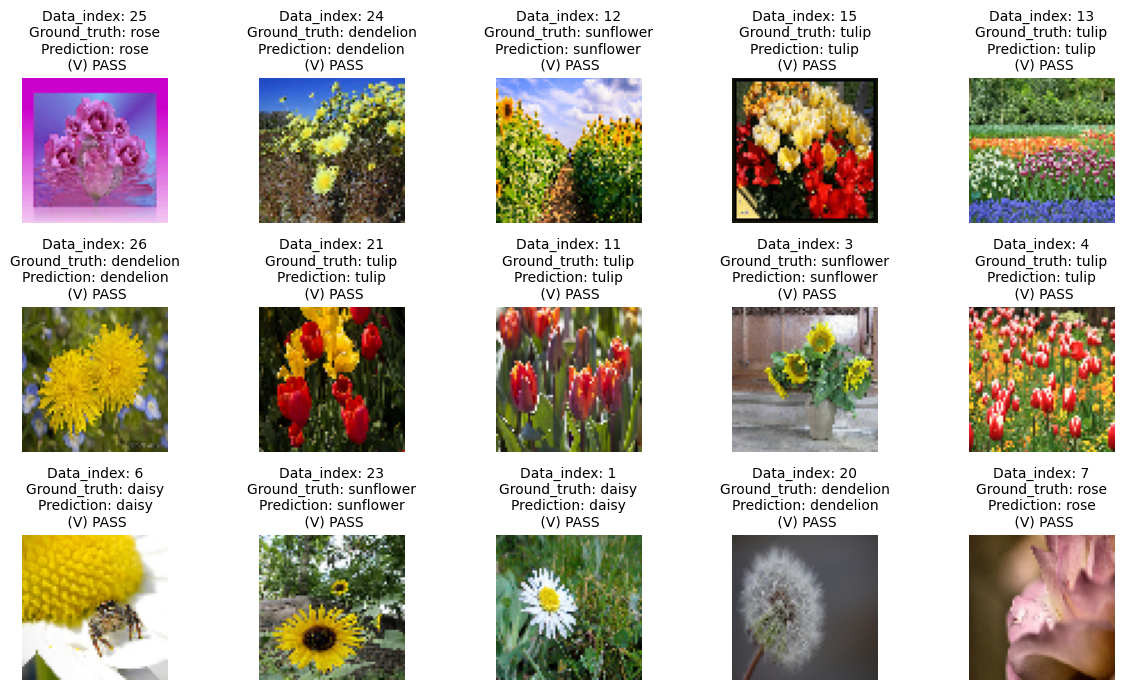

In [58]:
# Random pick prediction result
fig,ax = plt.subplots(3,5)
fig.set_size_inches(12,7)

pick = random.sample(range(0,len(test_data)+1, 1), 15)
correct, wrong, xx = 0, 0, 0

for i in range(3):
    for j in range (5):    
        flag = '(V) PASS'

        # compare prediciton and the answer
        idx = pick[xx]
        ax[i,j].set_axis_off()
        ax[i,j].imshow(testdata[idx])
        
        if (test_lbls[idx] != pred_lbls[idx]):
            flag = '(X) Wrong'
            wrong += 1
        else:
            correct += 1

        ax[i,j].set_title('Data_index: '+str(idx) + '\nGround_truth: '+ test_lbls[idx]+ '\nPrediction: ' + pred_lbls[idx]+ '\n '+ flag, size='10')
        xx += 1

plt.tight_layout()
plt.savefig('./output/cnn_pred_result.png')

print(f"prediciton result: (correct) {correct} \nprediciton result: (incorrect) {wrong}")

**Evaluate the performance of the model**

              precision    recall  f1-score   support

       daisy       0.85      0.95      0.90       147
   dendelion       0.93      0.91      0.92       200
        rose       0.85      0.84      0.84       151
   sunflower       0.90      0.92      0.91       140
       tulip       0.87      0.81      0.84       192

    accuracy                           0.88       830
   macro avg       0.88      0.89      0.88       830
weighted avg       0.88      0.88      0.88       830



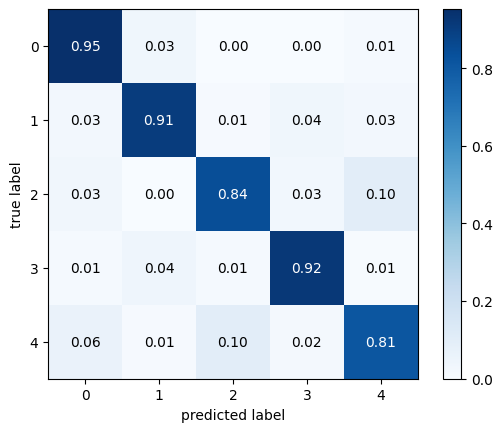

In [59]:
# Get confusion_matrix and classification from tensorflow
cm = confusion_matrix(test_lbls, pred_lbls)
report = classification_report(test_lbls, pred_lbls)
print(report)

# export classification_report.txt 
f = open("./output/classification_report.txt", "x")
f.write(report)
f.close()

# plot_confusion_matrix from mlxtend
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.savefig('./output/confusion_matrix.png')
plt.show()
